## Exploratory Data Analysis of the COVID-19 Pandemic in the United States

## The Forced SIR model

#### By Paul Doan (April 2020)
#### Adapted from Harvard APMTH10 by Profs. Eleni Angelaki Kaxiras, Efthimios Kaxiras

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.stats import norm

In [3]:
import pandas as pd
import seaborn as sns
import warnings
import glob
# extend pandas printing instead of ...
pd.options.display.max_columns = 500  
pd.options.display.max_rows = 3000     
pd.options.display.max_colwidth = 200
pd.options.display.precision = 3

### Import Daily Data from:
https://github.com/nytimes/covid-19-data
(Sourced from the European Centre for Disease Control)

In [5]:
data = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
daily_coronadata = pd.read_csv(data, index_col=False)
daily_coronadata.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [92]:
#
#  Display all the data for a state
#
state1 = 'California'
state2 = 'Massachusetts'
# California
daily_coronadata[daily_coronadata['state']==state1].tail()

,date,state,fips,cases,deaths
1833,2020-04-05,California,6,15076,349
1888,2020-04-06,California,6,16284,386
1943,2020-04-07,California,6,17540,447
1998,2020-04-08,California,6,19043,506
2054,2020-04-09,California,6,20191,548


In [93]:
daily_coronadata[daily_coronadata['state']==state2].tail()

,date,state,fips,cases,deaths
1851,2020-04-05,Massachusetts,25,12500,231
1906,2020-04-06,Massachusetts,25,13837,260
1961,2020-04-07,Massachusetts,25,15202,356
2016,2020-04-08,Massachusetts,25,16790,433
2072,2020-04-09,Massachusetts,25,18941,503


In [76]:
cummulative_all_CA = daily_coronadata[daily_coronadata['state']==state1]['cases'].to_numpy()[::1]
print(cummulative_all_CA)

daily_all_CA = np.empty([len(cummulative_all_CA)], dtype=int)
daily_all_CA[0] = cummulative_all_CA[0]
for number in range(1, len(cummulative_all_CA), 1):
    daily_all_CA[number] = int(cummulative_all_CA[number] - cummulative_all_CA[number - 1])
print(daily_all_CA)

daily_CA = daily_all_CA[34:]
print(daily_CA)

[    1     2     2     2     2     2     3     3     6     6     6     6
     6     6     6     6     7     7     7     7     7     7     7     7
     7     7     8     9     9     9    11    11    26    26    27    28
    33    38    45    55    67    81   100   112   172   179   202   252
   320   381   478   588   732   893  1067  1283  1544  1851  2240  2644
  3183  4060  4914  5565  6266  7421  8582  9816 11190 12569 13796 15076
 16284 17540 19043 20191]
[   1    1    0    0    0    0    1    0    3    0    0    0    0    0
    0    0    1    0    0    0    0    0    0    0    0    0    1    1
    0    0    2    0   15    0    1    1    5    5    7   10   12   14
   19   12   60    7   23   50   68   61   97  110  144  161  174  216
  261  307  389  404  539  877  854  651  701 1155 1161 1234 1374 1379
 1227 1280 1208 1256 1503 1148]
[   1    1    5    5    7   10   12   14   19   12   60    7   23   50
   68   61   97  110  144  161  174  216  261  307  389  404  539  877
  854  

In [78]:
cummulative_all_MA = daily_coronadata[daily_coronadata['state']==state2]['cases'].to_numpy()[::1]
print(cummulative_all_MA)

daily_all_MA = np.empty([len(cummulative_all_MA)], dtype=int)
daily_all_MA[0] = cummulative_all_MA[0]
for number in range(1, len(cummulative_all_MA), 1):
    daily_all_MA[number] = int(cummulative_all_MA[number] - cummulative_all_MA[number - 1])
print(daily_all_MA)

daily_MA = daily_all_MA[33:]
print(daily_MA)

[    1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     2     2     2     3     8    13
    28    41    92    95   108   123   138   164   197   218   256   328
   413   525   646   777  1159  1838  2417  3240  4257  4955  5752  6620
  7738  8966 10402 11736 12500 13837 15202 16790 18941]
[   1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    0    0    1    5    5   15   13   51    3   13   15
   15   26   33   21   38   72   85  112  121  131  382  679  579  823
 1017  698  797  868 1118 1228 1436 1334  764 1337 1365 1588 2151]
[   1    5    5   15   13   51    3   13   15   15   26   33   21   38
   72   85  112  121  131  382  679  579  823 1017  698  797  868 1118
 1228 1436 1334  764 1337 1365 1588 2151]


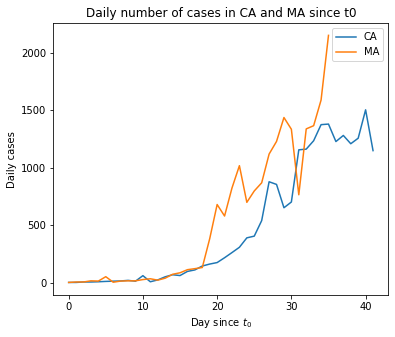

In [79]:
fig=plt.figure(figsize=(6,5))
plt.plot(daily_CA,label='CA')
plt.plot(daily_MA,label='MA')
plt.xlabel('Day since $t_0$')
plt.ylabel('Daily cases')
plt.legend()
plt.title('Daily number of cases in CA and MA since t0')
fig.savefig('Daily_number_of_cases_in_CA_MA_since_t0.png',format='png')

___________________________________________________________________________________________________________________________

## Using sigmoid function to approximate SIR model

In [46]:
# Fit to model
def sigmoid(a,t0,t):
    return 1.0/(1.0+np.exp(-a*(t-t0)))

In [47]:
# Define here the model function for I(t) -difference of 2 sigmoids
# return the predicted graph of Infected(t)
def daily_fit(t,t1,dt,N2):
    a1=0.25
    a2=0.25
    t01=t1
    t02=t01+dt
    return N2*(sigmoid(a1,t01,t)-sigmoid(a2,t02,t))

## Application to CA

[  28.58624998   17.42233832 1672.55074283]
[[ 4.39294956e-01 -1.41647732e+00  8.23262204e+01]
 [-1.41647732e+00  5.97529971e+00 -3.21999564e+02]
 [ 8.23262204e+01 -3.21999564e+02  1.87346988e+04]]
[1.29930208e+00 1.66795929e+00 2.14107989e+00 2.74817576e+00
 3.52703864e+00 4.52602574e+00 5.80695250e+00 7.44873754e+00
 9.55197010e+00 1.22445908e+01 1.56888880e+01 2.00899998e+01
 2.57060590e+01 3.28599922e+01 4.19527342e+01 5.34771909e+01
 6.80315796e+01 8.63297163e+01 1.09204343e+02 1.37597730e+02
 1.72531829e+02 2.15048909e+02 2.66114107e+02 3.26475647e+02
 3.96488312e+02 4.75921687e+02 5.63793434e+02 6.58281302e+02
 7.56764296e+02 8.56015580e+02 9.52521980e+02 1.04285737e+03
 1.12401521e+03 1.19362223e+03 1.25000100e+03 1.29210026e+03
 1.31934549e+03 1.33147151e+03 1.32838896e+03 1.31011885e+03
 1.27680949e+03 1.22883244e+03]


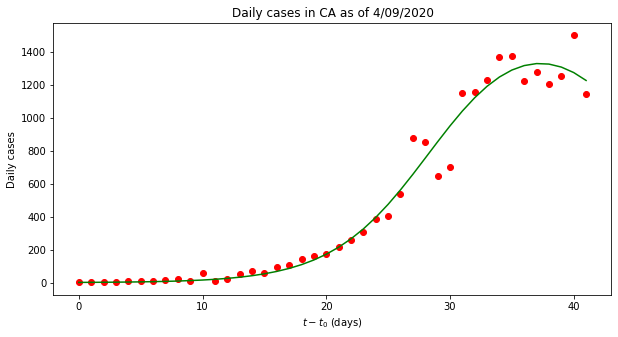

In [100]:
# CA daily data and parameters
fdat = daily_CA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
print(pcov)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)
print(ffit)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('Daily cases in CA as of 4/09/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
#fig.savefig('Daily_CA.png',format='png')

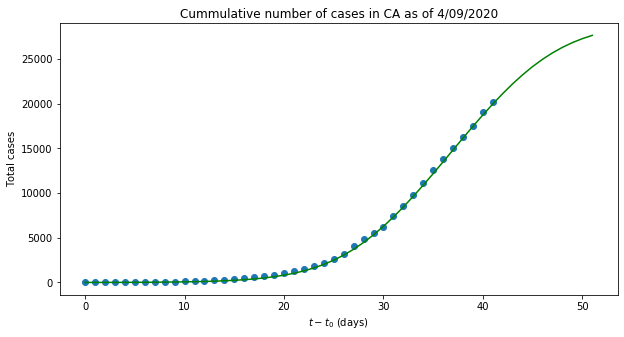

Total cases: 27648 cases, Days until peak: 9 days
-----------------------------------------------------------------------------------------


In [101]:
# CA CUMULATIVE data and time-extension (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=10
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]

fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('Cummulative number of cases in CA as of 4/09/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
#fig.savefig('Total_CA.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break

print(f'Total cases: {int(Nt)} cases, Days until peak: {imax-len(xdat)} days') 
print('-----------------------------------------------------------------------------------------')

## Application to MA

[  24.18064049 4020.55152585 1660.83865162]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]
[   3.92572617    5.03735035    6.46251872    8.28887762   10.62806417
   13.6219461    17.45027402   22.33992793   28.57586337   36.51369785
   46.59357065   59.35438622   75.44672705   95.64151106  120.82984233
  152.00757941  190.23634273  236.57192026  291.95284189  357.04823497
  432.07643076  516.62340496  609.50789668  708.74803976  811.6715931
  915.17467296 1016.08338305 1111.53281066 1199.2707871  1277.82376765
 1346.5119468  1405.34485682 1454.85051877 1495.8896249  1529.49066571
 1556.72338497]


/Users/paul/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


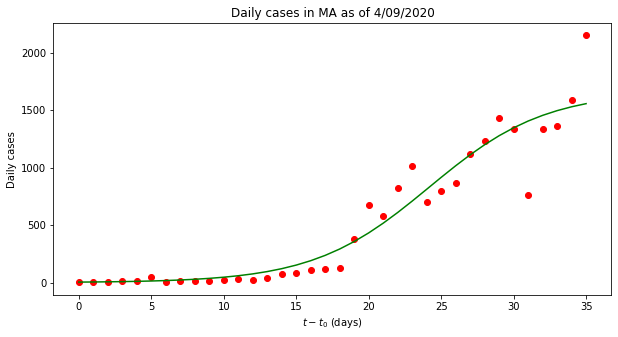

In [102]:
# MA daily data and parameters
fdat = daily_MA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
print(pcov)
t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)
print(ffit)

fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title('Daily cases in MA as of 4/09/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
#fig.savefig('Daily_MA.png',format='png')

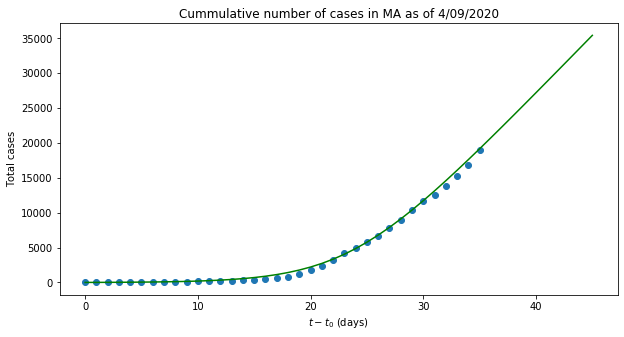

Total cases: 35426 cases, Days until peak: 9 days
-----------------------------------------------------------------------------------------


In [103]:
# MA CUMULATIVE data and time-extension (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=10
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]

fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('Cummulative number of cases in MA as of 4/09/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
#fig.savefig('Total_MA.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break

print(f'Total cases: {int(Nt)} cases, Days until peak: {imax-len(xdat)} days') 
print('-----------------------------------------------------------------------------------------')

## See your own state!

In [111]:
states = {"Alaska":"AL", "Arkansas":"AK", "Arizona":"AZ", "Arkansas":"AR", "California":"CA", 
          "Colorado":"CO", "Connecticut":"CT", "Delaware":"DE", 
          "Florida":"FL","Georgia":"GA", 
          "Hawaii":"HI", "Indiana":"ID", "Illinois":"IL", "Indiana":"IN", "Iowa":"IA", "Kansas":"KS", 
          "Kentucky":"KY", "Lousiana":"LA", "Maine":"ME", "Maryland":"MD", 
          "Massachusetts":"MA", "Maine":"MI", "Minnesota":"MN", "Missouri":"MS", "Missouri":"MO",
          "Montana":"MT", "Nebraska":"NE", "Nevada":"NV", "New Hampshire":"NH", "New Jersey":"NJ", 
          "New Mexico":"NM", "New York":"NY", "North Carolina":"NC", "North Dakota":"ND",
          "Ohio":"OH", "Oklahoma":"OK", "Oregon":"OR", "Pennsylvania":"PA", "Rhode Island":"RI",
          "South Carolina":"SC", "South Dakota":"SD", "Tennessee":"TN", "Texas":"TX", 
          "Utah":"UT", "Vermost":"VT", "Virginia":"VA", "Washington":"WA", "West Virginia":"WV",
          "Wisconsin":"WI", "Wyoming":"WY"}

In [118]:
# Data trimming
#
#  Display all the data for a state
#
state_of_interest = input("Input state's name: ")
code_state_of_interest = states[state_of_interest]
print(code_state_of_interest)
daily_coronadata[daily_coronadata['state']==state_of_interest].tail()

Input state's name:  New York


NY


,date,state,fips,cases,deaths
1862,2020-04-05,New York,36,122911,4161
1917,2020-04-06,New York,36,130703,4758
1972,2020-04-07,New York,36,140081,5563
2027,2020-04-08,New York,36,149401,6268
2083,2020-04-09,New York,36,159937,7067


In [123]:
cummulative_all_SOI = daily_coronadata[daily_coronadata['state']==state_of_interest]['cases'].to_numpy()[::1]

daily_all_SOI = np.empty([len(cummulative_all_SOI)], dtype=int)
daily_all_SOI[0] = cummulative_all_SOI[0]
for number in range(1, len(cummulative_all_SOI), 1):
    daily_all_SOI[number] = int(cummulative_all_SOI[number] - cummulative_all_SOI[number - 1])

print('Nu')
print(daily_all_SOI)

[    1     0     1     9    11    22    45    17    36    31    44   109
    95   189   122   218   424  1008  1770  2950  3254  4812  5707  4790
  7401  5921  5648  8728  6205  7606  8658  8057  8881 10100 12126  7915
  7792  9378  9320 10536]


In [121]:
# Choose the start date of the outbreak
start_of_outbreak = int(input("Choose the start date of outbreak since t0:"))
daily_SOI = daily_all_SOI[start_of_outbreak:]
print(daily_SOI)

Choose the start date of outbreak since t0: 0


[    1     0     1     9    11    22    45    17    36    31    44   109
    95   189   122   218   424  1008  1770  2950  3254  4812  5707  4790
  7401  5921  5648  8728  6205  7606  8658  8057  8881 10100 12126  7915
  7792  9378  9320 10536]


/Users/paul/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


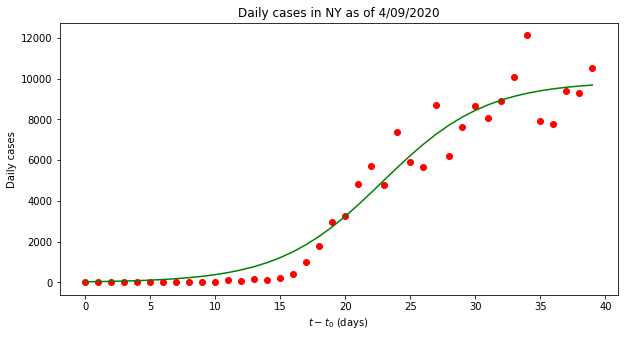

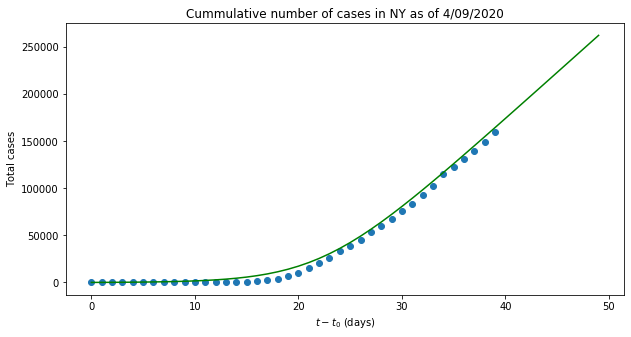

Total cases: 262655 cases, Days until peak: 9 days
-----------------------------------------------------------------------------------------


In [122]:
# SOI daily data and parameters
fdat = daily_SOI
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)

t1=popt[0]
dt=popt[1]
N2=popt[2]

ffit=daily_fit(xdat, t1, dt, N2)


fig=plt.figure(figsize=(10,5))
plt.plot(xdat,fdat,'ro')
plt.plot(xdat,ffit,'g')
plt.title(f'Daily cases in {code_state_of_interest} as of 4/09/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
#fig.savefig(f'Daily_{code_state_of_interest}.png',format='png')


# SOI CUMULATIVE data and time-extension (PREDICTION)

cumm_dat=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]

T_ext=10
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, N2)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]

fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title(f'Cummulative number of cases in {code_state_of_interest} as of 4/09/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
#fig.savefig(f'Total_{code_state_of_interest}.png',format='png')

# Estimating
Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break

print(f'Total cases: {int(Nt)} cases, Days until peak: {imax-len(xdat)} days') 
print('-----------------------------------------------------------------------------------------')